<a href="https://colab.research.google.com/github/prajwal0210/sentiment-detection-model/blob/main/sentiment_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment-Detection**

In [1]:
pip install neattext

     |████████████████████████████████| 112kB 4.3MB/s 


In [2]:
pip install scikit-learn

In [3]:
# Loading EDA packages
import pandas as pd
import numpy as np

#ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading Data Visualization packages
import seaborn as sns

In [5]:
# Loading Text Cleaning Packages
import neattext.functions as nfx 

In [6]:
# Loading Machine Learning Packages
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB

#Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
# Loading Data set
df = pd.read_csv("/content/emotion_dataset_raw.csv.txt")
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [9]:
# Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

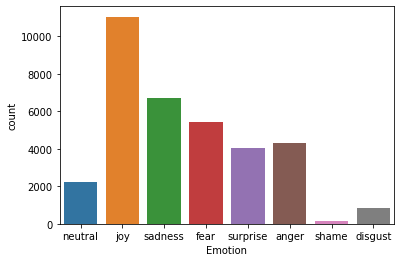

In [10]:
# ploting 
sns.countplot(x='Emotion', data=df)

In [11]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [12]:
# Removing user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [13]:
# Removing stop Words
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [14]:
# Removing special characters
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_special_characters)

In [15]:
df.head()

,Emotion,Text,Clean_Text
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...


In [16]:
# Fetures and labels
xfeatures = df['Clean_Text'] 
ylabels = df['Emotion']

In [17]:
# Train-Test-Split
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.3, random_state=42)

In [18]:
# building model pipleline
from sklearn.pipeline import Pipeline

In [19]:
# Logistic Regression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [20]:
# Train and fit
pipe_lr.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('cv',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                             

In [21]:
# checking accuracy
pipe_lr.score(x_test, y_test)

0.6215750143705691

In [22]:
# making Prediction
ex1 = "This book was so intresting it made me happy"

In [23]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [24]:
# checking propability
pipe_lr.predict_proba([ex1])

array([[6.75724582e-03, 2.11862436e-02, 3.31560809e-02, 8.37434117e-01,
        4.02811868e-05, 8.31481696e-02, 1.51261946e-04, 1.81265998e-02]])

**As you can see joy has the highest probability**

In [25]:
# to know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [ ]:
# Saving the model
import joblib
pipeline_file =  open('emotion_classifier_pipe_lr_11-july-2021.pkl','wb')
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close

<function BufferedWriter.close>